In [1]:
def column_info(df, column_name):
    #print('max:' +df[column_name].max() +\" min:\" + df[column_name].min())\n",
    print(df[column_name].describe())
    print('_______________________________')
    missing_count = df[column_name].isnull().sum()
    missing_percentage = (missing_count / len(df)) * 100
    print(f"Missing values: {missing_count} ({missing_percentage:.2f}%)")
    print('_______________________________')
    print( df[column_name].unique())
    print('_______________________________')
    print(df[column_name].value_counts())

In [1]:
## Initial Setup and Data Loading
# Import necessary libraries for data analysis, visualization, and machine learning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import KNNImputer
from sklearn.metrics import mean_squared_error

from IPython.display import display
from scipy.stats import chi2_contingency
from sklearn.ensemble import IsolationForest

import warnings
warnings.filterwarnings("ignore")

In [2]:
# ## Step 1: Initial Data Assessment
# Load the original dataset and create a working copy
df_o = pd.read_excel('df_2018_final.xlsx')

In [3]:
df = df_o.copy()
df.sample(5)

,auth_name,authority_code,authority_status,budget_total_income,budget_reg_inc_total,budget_reg_inc_per_capita,budget_reg_inc_tax_grants,budget_reg_inc_local_services,budget_reg_inc_gov_services_total,budget_reg_inc_gov_education,...,Year of Establishment,Current Settlement Form,Organizational Affiliation,Coordinates,Average Elevation,Planning Committee,Police Jurisdiction,Year,English Settlement Name,Regional Authority Cluster
11,חוף הכרמל,15,מועצה אזורית,342056,261437,8215.863738,105412,18637,111510,80317,...,1955,310.0,2.0,1.800061e+09,161.0,631.0,10001813.0,2019.0,No'am,NaN
180,אילת,2600,עיריה,661039,573268,11038.182343,350643,13128,186052,140919,...,1951,150.0,NaN,1.941739e+09,164.0,602.0,10001955.0,2019.0,Elat,NaN
81,בית ג'ן,480,מועצה מקומית,90222,83970,7077.117573,32377,1915,46075,37095,...,NaN,270.0,NaN,2.357076e+09,900.0,258.0,10004465.0,2019.0,Beit Jann,212.0
178,גדרה,2550,מועצה מקומית,214322,151648,5398.070694,81294,4643,52444,37837,...,1884,160.0,NaN,1.792664e+09,57.0,431.0,15002488.0,2019.0,Gedera,420.0
3,מטה אשר,4,מועצה אזורית,399803,315721,10786.873484,134362,26216,130014,102899,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.describe()

,authority_code,budget_total_income,budget_reg_inc_total,budget_reg_inc_per_capita,budget_reg_inc_tax_grants,budget_reg_inc_local_services,budget_reg_inc_gov_services_total,budget_reg_inc_gov_education,budget_reg_inc_gov_welfare,budget_reg_inc_gov_culture,...,Metropolitan Affiliation,Settlement Religion,Current Settlement Form,Organizational Affiliation,Coordinates,Average Elevation,Planning Committee,Police Jurisdiction,Year,Regional Authority Cluster
count,255.000000,2.550000e+02,2.550000e+02,255.000000,2.550000e+02,255.000000,2.550000e+02,2.550000e+02,255.000000,255.000000,...,115.000000,230.000000,230.000000,21.000000,2.300000e+02,230.000000,230.000000,2.300000e+02,230.0,102.000000
mean,2074.862745,3.371858e+05,2.658228e+05,8396.607327,1.403677e+05,12293.137255,9.500215e+04,6.751834e+04,23913.133333,2643.862745,...,208.913043,1.456522,222.130435,7.190476,2.085570e+09,220.647826,394.960870,1.085100e+07,2019.0,358.500000
std,2737.161334,7.551325e+05,5.851190e+05,6908.088219,3.577615e+05,32132.301541,1.682807e+05,1.116057e+05,52612.374618,4467.658760,...,101.220150,0.677348,66.294832,6.910999,2.497470e+08,237.740257,166.744302,1.879940e+06,0.0,188.960562
min,1.000000,1.988800e+04,1.297200e+04,4014.846743,8.083000e+03,28.000000,3.363000e+03,1.861000e+03,472.000000,0.000000,...,110.000000,1.000000,120.000000,1.000000,1.430458e+09,-156.000000,101.000000,1.000143e+07,2019.0,210.000000
25%,88.500000,7.258800e+04,5.859200e+04,6099.216042,2.552550e+04,1656.000000,2.296250e+04,1.620400e+04,4946.000000,575.000000,...,141.000000,1.000000,160.000000,1.000000,1.893363e+09,51.250000,257.000000,1.000216e+07,2019.0,212.000000
50%,638.000000,1.472810e+05,1.182210e+05,7303.650794,4.777600e+04,4646.000000,5.109200e+04,3.826300e+04,9748.000000,1321.000000,...,145.000000,1.000000,190.000000,2.000000,2.067224e+09,138.500000,354.000000,1.000432e+07,2019.0,214.000000
75%,2900.000000,3.150805e+05,2.303015e+05,9111.776542,1.107790e+05,11777.000000,9.551200e+04,6.837050e+04,22939.500000,2930.500000,...,241.000000,2.000000,280.000000,15.000000,2.260899e+09,311.250000,505.750000,1.000455e+07,2019.0,610.000000
max,9800.000000,7.874453e+06,6.051968e+06,106751.491054,3.617050e+06,436291.000000,1.920262e+06,1.219106e+06,614501.000000,42366.000000,...,445.000000,4.000000,370.000000,19.000000,2.730079e+09,1231.000000,730.000000,1.500449e+07,2019.0,710.000000




# Data Cleaning Process


### Initial Data Assessment

In [5]:
def advanced_analyze_columns(df):
    """ Perform advanced analysis of each column in a DataFrame """
    analysis = []

    for col in df.columns:
        # Basic information
        missing_percentage = df[col].isnull().mean() * 100
        unique_values = df[col].nunique()
        dtype = df[col].dtype

        # Variance (if numeric)
        variance = df[col].var() if pd.api.types.is_numeric_dtype(df[col]) else None

        # Mode and frequency of the mode
        most_frequent_value = df[col].mode().iloc[0] if not df[col].mode().empty else None
        mode_count = df[col].value_counts().iloc[0] if not df[col].value_counts().empty else 0
        mode_percentage = (mode_count / len(df[col])) * 100 if len(df[col]) > 0 else 0

        # Add results to the list
        analysis.append({
            'Column': col,
            'Missing_Percentage': missing_percentage,
            'Unique_Values': unique_values,
            'Data_Type': dtype,
            'Variance': variance,
            'Most_Frequent_Value': most_frequent_value,
            'Most_Frequent_Value_Count': mode_count,
            'Most_Frequent_Value_Percentage': mode_percentage
        })

    # Convert to DataFrame and sort by missing percentage
    analysis_df = pd.DataFrame(analysis)
    return analysis_df.sort_values(by='Missing_Percentage', ascending=False).reset_index(drop=True)

# Generate initial analysis results
advanced_analysis_result = advanced_analyze_columns(df)
advanced_analysis_result[50:100]

,Column,Missing_Percentage,Unique_Values,Data_Type,Variance,Most_Frequent_Value,Most_Frequent_Value_Count,Most_Frequent_Value_Percentage
50,water_type_pct_residential,21.176471,200,float64,1.942522e+02,0.0,2,0.784314
51,water_type_pct_municipal,21.176471,197,float64,1.317370e+01,0.0,5,1.960784
52,water_type_pct_gardening,21.176471,174,float64,2.187358e+01,0.0,28,10.980392
53,water_type_pct_commercial,21.176471,197,float64,2.578480e+01,0.0,5,1.960784
54,water_type_pct_construction,21.176471,191,float64,5.291465e+00,0.0,11,4.313725
55,Natural Region,16.470588,45,float64,2.222730e+04,237.0,17,6.666667
56,demo_migrate_incoming_age_65plus,12.941176,96,float64,1.609523e+04,0.0,45,17.647059
57,demo_inst_residents_total_pct,12.549020,136,float64,5.500587e+06,0.0,83,32.549020
58,demo_inst_elderly_homes_pct,12.549020,65,float64,2.195382e-01,0.0,144,56.470588
59,demo_inst_education_pct,12.549020,83,float64,4.609586e+00,0.0,128,50.196078


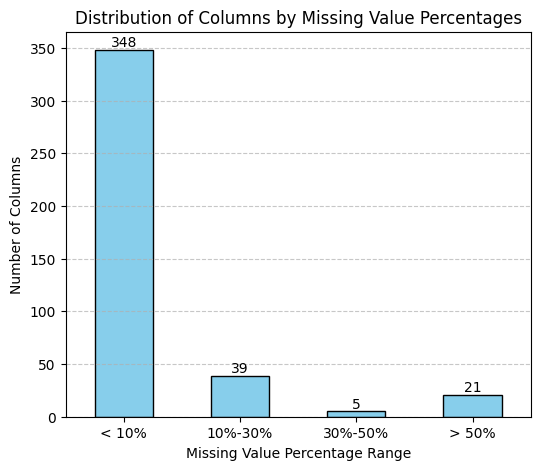

In [6]:
def plot_missing_value_distribution(df):
    """ Creates a bar plot showing the distribution of columns based on their percentage of missing values.
        Adds value labels above each bar """
    # Calculate missing percentages for each column
    missing_percentages = df.isnull().mean() * 100

    # Categorize columns based on missing percentages
    bins = [0, 10, 30, 50, 100]
    labels = ["< 10%", "10%-30%", "30%-50%", "> 50%"]
    categories = pd.cut(missing_percentages, bins=bins, labels=labels, include_lowest=True)

    # Count columns in each category
    category_counts = categories.value_counts().sort_index()

    # Plot the distribution of missing value categories with value labels
    plt.figure(figsize=(6, 5))
    bars = category_counts.plot(kind='bar', edgecolor='black', color='skyblue')
    plt.title("Distribution of Columns by Missing Value Percentages")
    plt.xlabel("Missing Value Percentage Range")
    plt.ylabel("Number of Columns")
    plt.xticks(rotation=0)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Add value labels above the bars
    for bar in bars.patches:
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5,
                 f'{int(bar.get_height())}',
                 ha='center', va='bottom')
    plt.show()

plot_missing_value_distribution(df)

### Column Removal

In [7]:
#removing non-unique values
advanced_analysis_result[advanced_analysis_result['Unique_Values'] <=1]
df_1 = df.drop(columns=['Year'], axis=1)

In [8]:
def get_columns_by_bins(missing_percentages):
    """ Groups columns into bins based on their percentage of missing values """
    # Define bins and labels
    bins = [0, 10, 30, 50, 100]
    labels = [
        "< 10%", "10%-30%", "30%-50%", "> 50%"
    ]
    # Categorize columns based on their missing percentages
    categories = pd.cut(missing_percentages, bins=bins, labels=labels, include_lowest=True)

    # Group columns by bins
    grouped_columns = {}
    for label in labels:
        grouped_columns[label] = list(missing_percentages.index[categories == label])

    return grouped_columns

#Calculate missing percentages
missing_percentages = df_1.isnull().mean() * 100

#Get columns by bins
columns_by_bins = get_columns_by_bins(missing_percentages)
list_30_50 = columns_by_bins.get( "30%-50%")
list_50 = columns_by_bins.get("> 50%")
list_10_30=columns_by_bins.get("10%-30%")
list_10=columns_by_bins.get("< 10%")

In [9]:
df_2 = df_1.drop(columns=list_50, axis=1)
df_3 = df_2.drop(columns=list_30_50, axis=1)

In [10]:
df_3.sample(5)

,auth_name,authority_code,authority_status,budget_total_income,budget_reg_inc_total,budget_reg_inc_per_capita,budget_reg_inc_tax_grants,budget_reg_inc_local_services,budget_reg_inc_gov_services_total,budget_reg_inc_gov_education,...,Sub-District,Natural Region,Municipal Status,Settlement Religion,Current Settlement Form,Coordinates,Average Elevation,Planning Committee,Police Jurisdiction,English Settlement Name
188,טירה,2720,עיריה,117479,107900,4124.144785,55612,3814,46302,31080,...,41.0,412.0,0.0,2.0,260.0,1.958168e+09,61.0,403.0,10002155.0,Tire
235,פרדס חנה-כרכור,7800,מועצה מקומית,314899,256691,6099.491493,122384,12657,89054,57600,...,32.0,324.0,99.0,1.0,160.0,1.979771e+09,48.0,308.0,10004261.0,Pardes Hanna-Karkur
20,ברנר,28,מועצה אזורית,144719,99076,12266.435558,39121,530,51657,41588,...,44.0,441.0,99.0,1.0,170.0,1.852964e+09,62.0,453.0,10002241.0,Mazkeret Batya
139,כעביה-טבאש-חג'אג'רה,978,מועצה מקומית,34035,27420,5069.328896,13293,1109,11082,5802,...,25.0,237.0,99.0,2.0,280.0,2.176674e+09,163.0,254.0,10004411.0,Ka'abiyye-Tabbash-Hajajre
179,ערד,2560,עיריה,224340,183061,6920.759140,106440,20955,52831,26321,...,62.0,623.0,0.0,1.0,160.0,2.203657e+09,488.0,610.0,10001911.0,Arad


### Missing Value Treatment

In [11]:
# Identify non-numeric columns with missing values
non_numeric_columns_with_na = df_3.select_dtypes(exclude='number').isnull().sum()

# Filter only columns with missing values
non_numeric_columns_with_na = non_numeric_columns_with_na[non_numeric_columns_with_na > 0]

# Display the result
print("Non-numeric columns with missing values:")
print(non_numeric_columns_with_na)


Non-numeric columns with missing values:
general_planning_committee_name     1
Transliteration                    25
English Settlement Name            25
dtype: int64


In [12]:
def cramers_v(x, y):
    """
    Calculate Cramér's V statistic for two categorical variables.
    """
    contingency_table = pd.crosstab(x, y)  # Create a contingency table
    chi2, _, _, _ = chi2_contingency(contingency_table)  # Perform Chi-squared test
    n = contingency_table.sum().sum()  # Total number of samples
    phi2 = chi2 / n
    r, k = contingency_table.shape
    return np.sqrt(phi2 / min(r - 1, k - 1))
# Replace 'column1' and 'column2' with the actual column names
column1 = df_3['Transliteration']
column2 = df_3['English Settlement Name']
# Calculate Cramér's V
cramers_v_value = cramers_v(column1,column2)
print(f"Cramér's V between 'region_name' and 'city_name': {cramers_v_value:.2f}")


Cramér's V between 'region_name' and 'city_name': 1.00


In [13]:
df_4 = df_3.drop(columns=['Transliteration','general_planning_committee_name'])

#### fill_missing_with_median

In [14]:
# Identify rows where 'English Settlement Name' is missing
missing_rows = df_4['English Settlement Name'].isnull()

# Get the corresponding Hebrew names for these rows
missing_hebrew_names = df_4.loc[missing_rows, 'auth_name'].unique()

# Print the missing Hebrew names
print("Hebrew names missing English translations:")
print(missing_hebrew_names)

Hebrew names missing English translations:
['הגליל העליון' 'מרום הגליל' 'הגליל התחתון' 'מטה אשר' 'עמק הירדן' 'הגלבוע'
 'עמק יזרעאל' 'זבולון' 'מנשה' 'חוף השרון' 'דרום השרון' 'חבל מודיעין' 'גזר'
 'שפיר' 'אשכול' 'שדות דן' 'מרחבים' 'אלונה' 'לכיש' 'תמר' 'הערבה התיכונה'
 'משגב' 'נווה מדבר' 'מטה בנימין' 'ערבות הירדן']


In [15]:
# Create translation dictionary for Hebrew to English names
transliteration_dict = {
    'הגליל העליון': 'Upper Galilee',
    'מרום הגליל': 'Merom HaGalil',
    'הגליל התחתון': 'Lower Galilee',
    'מטה אשר': 'Mateh Asher',
    'עמק הירדן': 'Jordan Valley',
    'הגלבוע': 'Gilboa',
    'עמק יזרעאל': 'Jezreel Valley',
    'זבולון': 'Zevulun',
    'מנשה': 'Menashe',
    'חוף השרון': 'Sharon Coast',
    'דרום השרון': 'Southern Sharon',
    'חבל מודיעין': 'Modiin Region',
    'גזר': 'Gezer',
    'שפיר': 'Shafir',
    'אשכול': 'Eshkol',
    'שדות דן': 'Sdot Dan',
    'מרחבים': 'Merhavim',
    'אלונה': 'Alona',
    'לכיש': 'Lachish',
    'תמר': 'Tamar',
    'הערבה התיכונה': 'Central Arava',
    'משגב': 'Misgav',
    'נווה מדבר': 'Neve Midbar',
    'מטה בנימין': 'Mateh Binyamin',
    'ערבות הירדן': 'Jordan Plains'
}

In [16]:
# Define the function to fill missing English names
def fill_missing_with_dict(df, hebrew_col, english_col, transliteration_dict):
    """
    Fill missing values in the English column using the transliteration dictionary.
    """
    df_copy = df.copy()
    missing_rows = df_copy[english_col].isnull()
    df_copy.loc[missing_rows, english_col] = df_copy.loc[missing_rows, hebrew_col].map(transliteration_dict)
    return df_copy

# Use the function to fill missing values
df_5 = fill_missing_with_dict(df_4, 'auth_name', 'English Settlement Name', transliteration_dict)

# Check if missing values are filled
print(df_5['English Settlement Name'].isnull().sum())

0


In [17]:
#Calculate missing percentages
missing_percentages = df_5.isnull().mean() * 100

#Get columns by bins
columns_by_bins = get_columns_by_bins(missing_percentages)
list_30_50 = columns_by_bins.get( "30%-50%")
list_50 = columns_by_bins.get("> 50%")
list_10_30=columns_by_bins.get("10%-30%")
list_10=columns_by_bins.get("< 10%")

In [18]:
def fill_missing_with_median(df, columns=None, threshold=0.1):
    """
    Fill missing values in numeric columns from a given list of columns with missing rate up to a given threshold using median.
    """
    df_copy = df.copy()

    # Use specified columns or all numeric columns if columns is None
    if columns is not None:
        numeric_columns = df_copy[columns].select_dtypes(include='number')
    else:
        numeric_columns = df_copy.select_dtypes(include='number')

    # Calculate missing value proportions for numeric columns
    missing_proportions = numeric_columns.isnull().mean()

    # Identify numeric columns with missing values up to the threshold
    columns_to_fill = missing_proportions[(missing_proportions > 0) & (missing_proportions <= threshold)].index

    # Fill missing values with median
    for col in columns_to_fill:
        df_copy[col].fillna(df_copy[col].median(), inplace=True)

    return df_copy

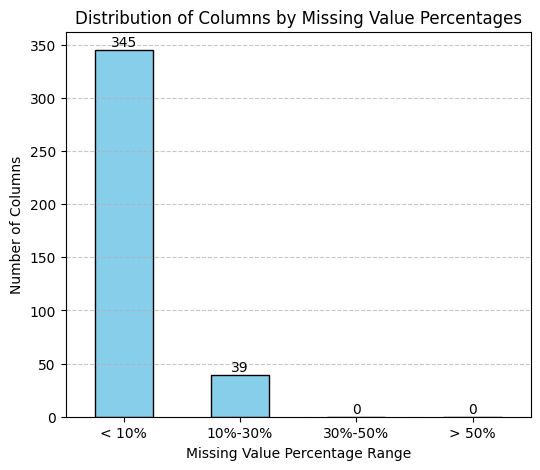

In [19]:
df_6 = fill_missing_with_median(df_5, columns=list_10, threshold=0.1)
plot_missing_value_distribution(df_6)

At this stage, we filled columns containing less than 10% missing values using the median,
which is suitable for columns that are not normally distributed or have a wide range of values.
We are now left with only 39 numeric columns that have between 10-30% missing values.

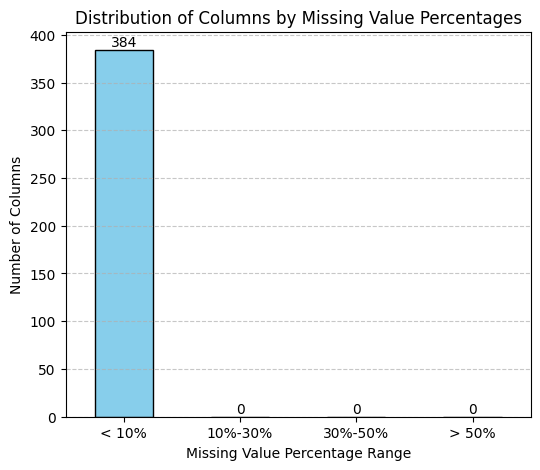

In [20]:
# Apply KNN imputation for columns with 10-30% missing values

def knn_imputation(df, columns, n_neighbors=5):
    """
    Fill missing values in specified columns using KNN imputation.
    """
    # Copy the DataFrame to avoid modifying the original
    df_copy = df.copy()

    # Ensure the columns exist in the DataFrame
    valid_columns = [col for col in columns if col in df_copy.columns]

    # Select only the specified columns
    data_to_impute = df_copy[valid_columns]

    # Apply KNN imputation
    imputer = KNNImputer(n_neighbors=n_neighbors)
    imputed_data = imputer.fit_transform(data_to_impute)

    # Replace the original data with the imputed data
    df_copy[valid_columns] = imputed_data

    return df_copy

df_7 = knn_imputation(df_6, list_10_30, n_neighbors=5)
plot_missing_value_distribution(df_7)

In [21]:
df_7.sample(5)

,auth_name,authority_code,authority_status,budget_total_income,budget_reg_inc_total,budget_reg_inc_per_capita,budget_reg_inc_tax_grants,budget_reg_inc_local_services,budget_reg_inc_gov_services_total,budget_reg_inc_gov_education,...,Sub-District,Natural Region,Municipal Status,Settlement Religion,Current Settlement Form,Coordinates,Average Elevation,Planning Committee,Police Jurisdiction,English Settlement Name
167,שוהם,1304,מועצה מקומית,229068,149135,7105.050024,71538,5088,65020,51028,...,43.0,432.0,99.0,1.0,160.0,1.949466e+09,96.0,421.0,10002168.0,Shoham
132,ירוחם,831,מועצה מקומית,134525,92395,9262.656642,54259,2277,35108,16603,...,62.0,626.0,99.0,1.0,170.0,1.930754e+09,518.0,612.0,10001918.0,Yeroham
15,דרום השרון,20,מועצה אזורית,368704,287078,8573.587385,112995,24648,121885,100744,...,32.0,297.0,99.0,1.0,190.0,2.067224e+09,138.5,354.0,10004315.0,Southern Sharon
14,חוף השרון,19,מועצה אזורית,141129,126236,8793.257175,80893,6057,21984,14548,...,32.0,342.2,99.0,1.0,190.0,2.067224e+09,138.5,354.0,10004315.0,Sharon Coast
154,ערערה-בנגב,1192,מועצה מקומית,133736,101923,5777.947846,33521,1221,54520,42449,...,62.0,623.0,99.0,2.0,270.0,2.021956e+09,458.0,652.0,15003711.0,Ar'ara-BaNegev


##  **Isolated forest**

https://www.kaggle.com/code/marcinrutecki/outlier-detection-methods#6.-Isolation-Forest


In [22]:
# Define the parameters of the Isolation Forest
model = IsolationForest(
    n_estimators=100,        # Number of trees in the forest
    max_samples='auto',      # Number of samples to draw from the dataset to train each base estimator
    contamination='auto',    # The amount of contamination of the data set, i.e., the proportion of outliers in the data set
    random_state=42          # Set the seed for reproducibility
)
# Fit the model to the data
df_is=df_7.select_dtypes(include=[np.number])
model.fit(df_is)

# Predict anomalies
df_is['anomaly'] = model.predict(df_is)
df_is['name']=df_1['auth_name']

# Define the desired column order with 'name' at the beginning
cols = ['name'] + [col for col in df_is.columns if col != 'name']

# Reorder the DataFrame columns
df_is = df_is[cols]

# Count the number of anomalies and normal points
print(df_is['anomaly'].value_counts())

# Separate the data into normal and anomalous points
normal_data = df_is[df_is['anomaly'] == 1]
anomalous_data = df_is[df_is['anomaly'] == -1]
anomalous_data

anomaly
 1    245
-1     10
Name: count, dtype: int64


,name,authority_code,budget_total_income,budget_reg_inc_total,budget_reg_inc_per_capita,budget_reg_inc_tax_grants,budget_reg_inc_local_services,budget_reg_inc_gov_services_total,budget_reg_inc_gov_education,budget_reg_inc_gov_welfare,...,Sub-District,Natural Region,Municipal Status,Settlement Religion,Current Settlement Form,Coordinates,Average Elevation,Planning Committee,Police Jurisdiction,anomaly
56,אשדוד,70,1904569,1638863,7295.865627,887400,39213,587115,381696,194291,...,61.0,613.0,0.0,1.0,130.0,1.669063e+09,23.0,603.0,10001836.0,-1
191,ירושלים,3000,7874453,6051968,6582.246981,3617050,436291,1920262,1219106,614501,...,11.0,111.0,0.0,4.0,120.0,2.209463e+09,715.0,101.0,10002489.0,-1
209,חיפה,4000,3554998,2784739,9817.864194,1552890,96905,584930,360981,211852,...,31.0,311.0,0.0,4.0,130.0,2.011275e+09,97.0,304.0,10004171.0,-1
216,תל אביב -יפו,5000,6809031,5090384,11273.833833,3448834,173361,945358,598557,318072,...,51.0,511.0,0.0,4.0,130.0,1.802766e+09,17.0,507.0,10001579.0,-1
218,בני ברק,6100,1495889,1357950,6828.570423,616188,33497,627255,438378,167728,...,52.0,512.0,0.0,1.0,130.0,1.845567e+09,26.0,501.0,15003979.0,-1
231,נתניה,7400,1878959,1623555,7473.451389,846723,73749,566283,391516,159359,...,41.0,411.0,0.0,1.0,130.0,1.872569e+09,28.0,408.0,10002089.0,-1
236,פתח תקווה,7900,2279230,1854497,7591.841163,1142363,87145,588600,414701,149588,...,42.0,422.0,0.0,1.0,130.0,1.894267e+09,31.0,410.0,10002116.0,-1
239,ראשון לציון,8300,2282430,1805435,7172.393930,981133,90538,580355,432704,145023,...,44.0,442.0,0.0,1.0,130.0,1.812465e+09,41.0,413.0,10002207.0,-1
242,רמת גן,8600,1710312,1391773,8744.489822,832561,40742,353016,262106,86890,...,52.0,512.0,0.0,1.0,140.0,1.835466e+09,37.0,506.0,10001533.0,-1
246,באר שבע,9000,2231049,1734170,8297.384714,964461,67286,565285,367126,183761,...,62.0,623.0,0.0,1.0,130.0,1.796357e+09,291.0,605.0,10001900.0,-1



##### Note on Outlier Retention:
#### We decided not to remove the outlier rows - after examination, we found these were cities like Jerusalem, Tel Aviv,
#### and other major cities that significantly reflect the state of the data. Their outlier status could indicate
#### interesting patterns or insights.

_________

### Analysis of Outlier Columns

In [23]:
def identify_columns_with_many_outliers(data, threshold=0.1):
    """
    Identify columns with a high percentage of outliers using IQR (Boxplot method).
    """
    numerical_data = data.select_dtypes(include=[np.number])
    outlier_info = {}

    for column in numerical_data.columns:
        col_data = numerical_data[column]

        # Calculate Q1, Q3, and IQR
        Q1 = col_data.quantile(0.2)
        Q3 = col_data.quantile(0.8)
        IQR = Q3 - Q1

        # Calculate bounds
        lower_bound = Q1 - 2 * IQR
        upper_bound = Q3 + 2 * IQR

        # Count outliers
        outliers = ((col_data < lower_bound) | (col_data > upper_bound)).sum()
        proportion_outliers = outliers / len(col_data)

        # Check if the column meets the threshold
        if proportion_outliers > threshold:
            outlier_info[column] = proportion_outliers

    return outlier_info

# Example usage:
outlier_columns = identify_columns_with_many_outliers(df_7, threshold=0.1)
for col, prop in outlier_columns.items():
    print(f"{col}: {prop:.2%} outliers")
len(outlier_columns)

budget_reg_inc_gov_trans_designated: 13.33% outliers
budget_reg_inc_gov_trans_deficit: 10.59% outliers
budget_dev_inc_property: 13.33% outliers
budget_dev_exp_loan_transfers: 12.94% outliers
budget_balance_regular_current: 10.20% outliers
budget_balance_reg_accumulated: 10.20% outliers
arnona_area_hotels: 12.16% outliers
arnona_area_parking: 13.33% outliers
arnona_area_land_industry_large: 14.90% outliers
arnona_area_agriculture_land: 12.16% outliers
arnona_area_agriculture_building: 14.90% outliers
arnona_charge_hotels: 14.51% outliers
arnona_charge_parking: 13.33% outliers
arnona_charge_land_industry_large: 14.90% outliers
arnona_charge_agriculture_land: 10.20% outliers
arnona_charge_agriculture_building: 10.59% outliers
general_area_km2: 12.16% outliers
demo_general_christian_pct: 18.43% outliers
demo_general_druze_pct: 16.86% outliers
demo_new_immigrants: 10.20% outliers
demo_internal_migration_balance: 10.20% outliers
edu_students_per_class_middle_2018: 15.69% outliers
edu_student

39

### We attempted to remove columns that were classified as problematic,
### however this only degraded our data performance and led to significantly worse results.

In [24]:
# Save the cleaned and processed dataset
output_file_name = "data_after_EDA.xlsx"
#df_7.to_excel(output_file_name, index=False)

print(f"The DataFrame has been successfully exported to {output_file_name}.")

The DataFrame has been successfully exported to data_after_EDA.xlsx.
